**HOUSE PRICE PREDICTION (USING RANDOM FOREST - N.Nandhini)**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
cat_cols = ['mainroad', 'guestroom', 'basement',
            'hotwaterheating', 'airconditioning',
            'prefarea', 'furnishingstatus']

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [7]:
print("\nAfter encoding:")
print(df.head())


After encoding:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [8]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [11]:
y_pred = rf.predict(X_test)
print("\nModel performance:")
print("R2 Score :", r2_score(y_test, y_pred))
print("RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred)))


Model performance:
R2 Score : 0.6147879518736361
RMSE     : 1395378.5712124193


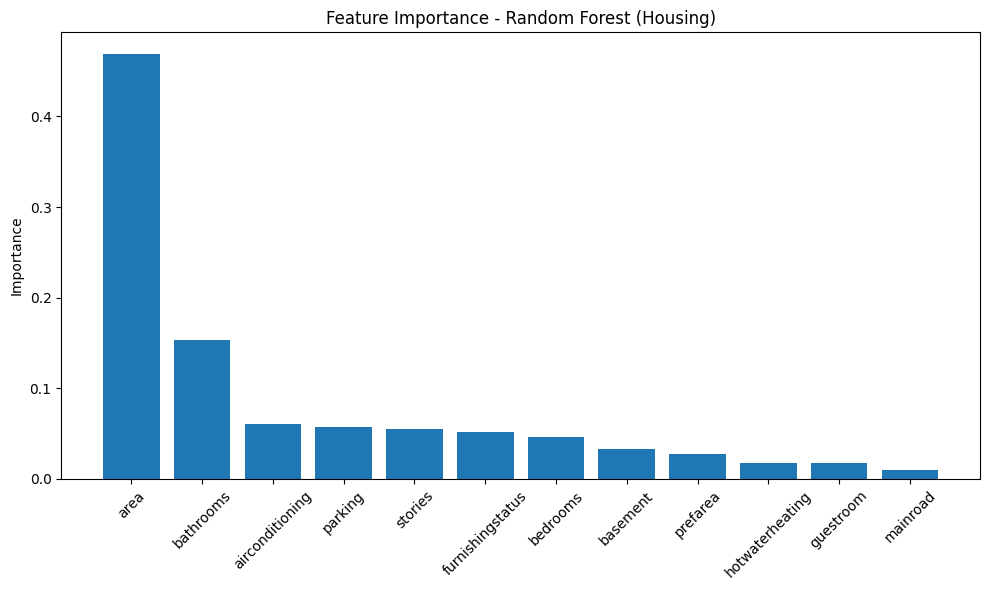

In [12]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest (Housing)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), X.columns[indices], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [13]:
def get_user_input_and_predict(encoders, model):
    print("\nEnter house details to predict price:\n")

    area = int(input("Area (in sq.ft): "))
    bedrooms = int(input("Number of bedrooms: "))
    bathrooms = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    parking = int(input("Number of parking spaces (0/1/2/3): "))

    mainroad_str = input("Main road access? (yes/no): ").strip().lower()
    guestroom_str = input("Guest room? (yes/no): ").strip().lower()
    basement_str = input("Basement? (yes/no): ").strip().lower()
    hotwater_str = input("Hot water heating? (yes/no): ").strip().lower()
    ac_str = input("Air conditioning? (yes/no): ").strip().lower()
    prefarea_str = input("Preferred area? (yes/no): ").strip().lower()
    furnish_str = input(
        "Furnishing status (furnished/semi-furnished/unfurnished): "
    ).strip().lower()


    mainroad = encoders['mainroad'].transform([mainroad_str])[0]
    guestroom = encoders['guestroom'].transform([guestroom_str])[0]
    basement = encoders['basement'].transform([basement_str])[0]
    hotwater = encoders['hotwaterheating'].transform([hotwater_str])[0]
    ac = encoders['airconditioning'].transform([ac_str])[0]
    prefarea = encoders['prefarea'].transform([prefarea_str])[0]
    furnish = encoders['furnishingstatus'].transform([furnish_str])[0]

    sample = [[area, bedrooms, bathrooms, stories,
               mainroad, guestroom, basement,
               hotwater, ac, parking, prefarea, furnish]]

    predicted_price = model.predict(sample)[0]
    print(f"\nPredicted House Price: {predicted_price:.2f}")

get_user_input_and_predict(encoders, rf)

for col in cat_cols:
    le = encoders[col]
    df[col + '_decoded'] = le.inverse_transform(df[col])


Enter house details to predict price:

Area (in sq.ft): 50000
Number of bedrooms: 3
Number of bathrooms: 3
Number of stories: 2
Number of parking spaces (0/1/2/3): 2
Main road access? (yes/no): no
Guest room? (yes/no): yes
Basement? (yes/no): yes
Hot water heating? (yes/no): yes
Air conditioning? (yes/no): yes
Preferred area? (yes/no): yes
Furnishing status (furnished/semi-furnished/unfurnished): semi-furnished

Predicted House Price: 9846235.00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
